# Carga de datos

## Librerias

In [1]:
from os import path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Constantes

In [2]:
SAVE_DATAFRAME = False
SAVE_FIG = False

PATH_MAIN = path.join("..")
PATH_DATA = path.join(PATH_MAIN, "datos")

PATH_FAKE = path.join(PATH_DATA, "Fake.csv")
PATH_TRUE = path.join(PATH_DATA, "True.csv")

## Carga del dataframe

In [5]:
df_fake = pd.read_csv(PATH_FAKE)
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
df_true = pd.read_csv(PATH_TRUE)
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
# Solo basta un dataframe pues comparten el nombre de las columnas
columnas = list(df_true.columns)
columnas

['title', 'text', 'subject', 'date']

## Información de los datasets

### Información de los datasets

Visualizar la información de las filas de los datasets.

In [10]:
df_fake.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [11]:
df_true.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [7]:
def is_date(string, fuzzy=False):
    """
    Return whether the string can be interpreted as a date.

    :Param string: str, string to check for date
    :Param fuzzy: bool, ignore unknown tokens in string if True
    """
    from dateutil.parser import parse
    
    try: 
        parse(string, fuzzy=fuzzy)
        return True

    except ValueError:
        return False

In [8]:
# pd.Timestamp(df_fake["date"])
nat = np.datetime64('NaT')
df_fake["date"] = df_fake["date"].apply(lambda x: pd.Timestamp(x) if is_date(x) else nat)
df_true["date"] = df_true["date"].apply(lambda x: pd.Timestamp(x) if is_date(x) else nat)

In [81]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25


In [82]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,2017-12-31
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,2017-12-29
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,2017-12-31
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,2017-12-30
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,2017-12-29


### Observar si existen datos nulos

Ver cuantos elementos nulos existen en el dataset.

In [69]:
df_fake.isna().sum()

title       0
text        0
subject     0
date       10
dtype: int64

In [71]:
df_true.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [77]:
df_fake.dropna(inplace=True)

### Variables únicas

En principio, la columna `'title'` y `'text'` no son ni númericas, ni categóricas. `'date'` es un tipo de variable temporal, mientras que `'subject'` es una variable categórica. 

Veamos cuantas variables categóricas diferentes hay para cada `DataFrame`.

In [22]:
pd.unique(df_true["subject"])

array(['politicsNews', 'worldnews'], dtype=object)

In [24]:
pd.unique(df_fake["subject"])

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east'], dtype=object)

¿A qué se refiere `'worldnews'`? Obtengamos una noticia de esta categoría para observarlo:

In [31]:
df_true[df_true["subject"] == "worldnews"]["text"][11272]

'YANGON (Reuters) - Two Reuters journalists who have been detained in Myanmar for the past two weeks were remanded in custody for a further two weeks on Wednesday as a probe continues into allegations they breached the nation s Official Secrets Act. Judge Ohn Myint granted the 14-day extension in the case of the journalists, Wa Lone, 31, and Kyaw Soe Oo, 27, at the request of the police, who then took them to Yangon s Insein prison. They were previously being held in a police compound. When they appeared at the Mingaladon court for the proceedings, Wa Lone and Kyaw Soe Oo were allowed to meet their families and their lawyer for the first time since their arrest. The two journalists had worked on Reuters coverage of a crisis in the western state of Rakhine, where - according to United Nations  estimates - about 655,000 Rohingya Muslims have fled from a fierce military crackdown on militants. They were detained on Dec 12 after they had been invited to meet police officials over dinner. T

Podemos decir entonces que una noticia de `'worldnews'` es una noticia estadounidense, que se refiere c/r al mundo.

¿Existirá un equivalente en `fakenews`?

## EDA

### Análisis gráfico del tiempo

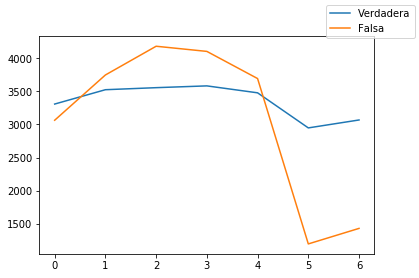

In [68]:
ts_f = df_fake["date"].apply(lambda x: x.dayofweek).value_counts().reset_index().sort_values(by= ['index'])
ts_t = df_true["date"].apply(lambda x: x.dayofweek).value_counts().reset_index().sort_values(by= ['index'])

fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot(ts_f['index'], ts_f['date'])  # Plot some data on the axes.
ax.plot(ts_t['index'], ts_t['date'])
fig.legend(['Verdadera', 'Falsa']) 

plt.show()

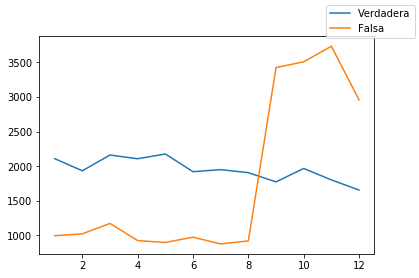

In [69]:
ts_f = df_fake["date"].apply(lambda x: x.month).value_counts().reset_index().sort_values(by= ['index'])
ts_t = df_true["date"].apply(lambda x: x.month).value_counts().reset_index().sort_values(by= ['index'])

fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot(ts_f['index'], ts_f['date'])  # Plot some data on the axes.
ax.plot(ts_t['index'], ts_t['date'])
fig.legend(['Verdadera', 'Falsa']) 

plt
plt.show()

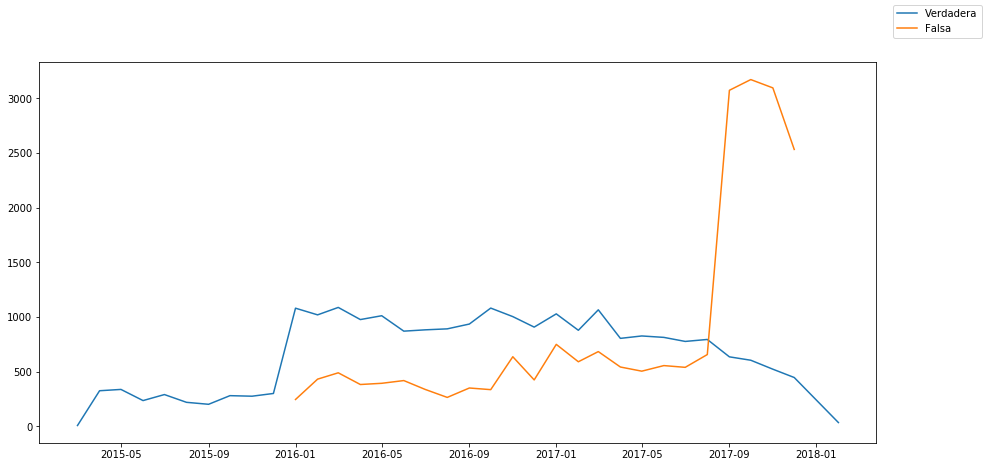

In [10]:
ts_f = df_fake["date"].dropna().apply(lambda x: pd.Timestamp(x.strftime("%Y-%m"))).value_counts().reset_index().sort_values(by= ['index'])
ts_t = df_true["date"].dropna().apply(lambda x: pd.Timestamp(x.strftime("%Y-%m"))).value_counts().reset_index().sort_values(by= ['index'])

fig, ax = plt.subplots(figsize= (15,7))  # Create a figure containing a single axes.
ax.plot(ts_f['index'], ts_f['date'])  # Plot some data on the axes.
ax.plot(ts_t['index'], ts_t['date'])
fig.legend(['Verdadera', 'Falsa']) 

plt
plt.show()

In [76]:
pd.Timestamp(df_fake["date"][7].strftime("%Y-%m"))

Timestamp('2017-12-01 00:00:00')

In [82]:
ts_f = df_fake["date"].dropna()

In [52]:
ts


3.0    3584
2.0    3557
1.0    3526
4.0    3479
0.0    3309
6.0    3068
5.0    2948
Name: date, dtype: int64